# Explore here

In [43]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from pickle import dump
import json

In [3]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 1. Exploración y limpieza

In [4]:
print(" The total number of rows in the dataset is: ", total_data.shape)
print("--------------------")
total_data.info()

 The total number of rows in the dataset is:  (41188, 21)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 1

Conclusiones:

1) El Dataframe contiente 41188 filas (registros) y 21 columnas (Variables)
2) Analizando la información disponible, se identifica que no existes valores NaN, por loq ue tendremos control total sobre la información del data.

En cuanto a la clasificación de los datos:

* Características categóricas (11 en total)
* Características numéricas (10 en total)


### 1.1 Quitar Duplicados

In [5]:
total_data.drop_duplicates(inplace=True)
print(f"Registros duplicados eliminados: {len(total_data) - len(total_data.drop_duplicates())}")

Registros duplicados eliminados: 0


Conclusiones:

Este DF no tiene registros duplicados

### 1.2 Eliminar información innecesaria

In [6]:
total_data.drop(["education","poutcome", "previous", "nr.employed","month","day_of_week"], axis = 1, inplace = True)
total_data.head()

,age,job,marital,default,housing,loan,contact,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,no,no,no,telephone,261,1,999,1.1,93.994,-36.4,4.857,no
1,57,services,married,unknown,no,no,telephone,149,1,999,1.1,93.994,-36.4,4.857,no
2,37,services,married,no,yes,no,telephone,226,1,999,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,no,no,no,telephone,151,1,999,1.1,93.994,-36.4,4.857,no
4,56,services,married,no,no,yes,telephone,307,1,999,1.1,93.994,-36.4,4.857,no


## 2. Análisis de variables Univariadas

### 2.1 Varbiables categóricas

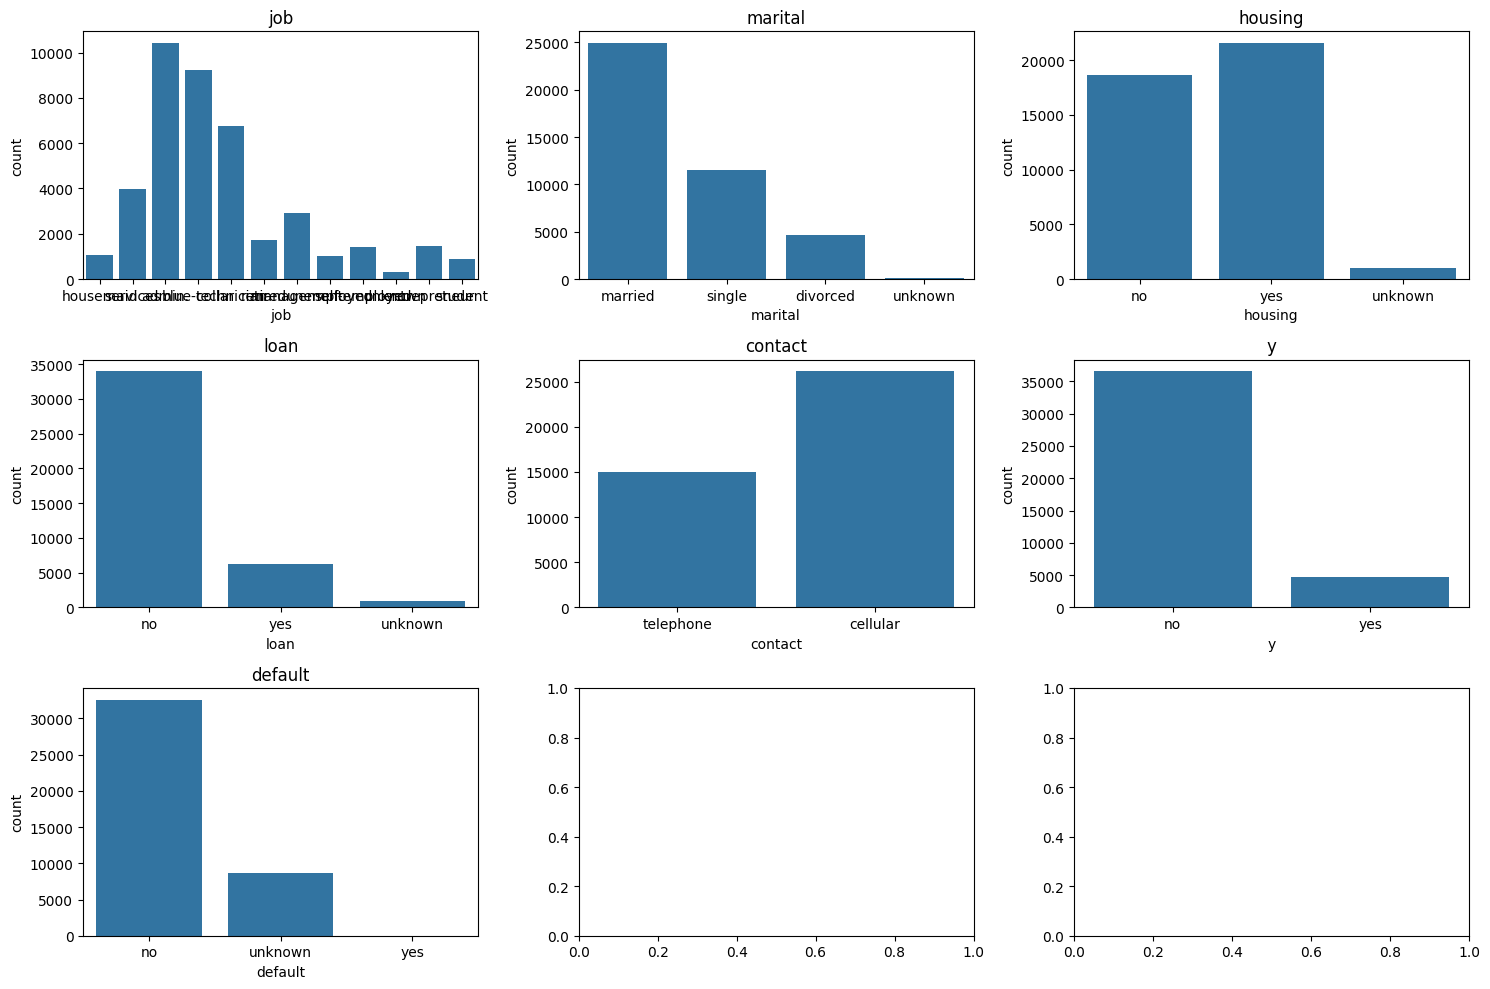

In [7]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10)) #Se cambia el numero de filas y columnas para que se adapte.
axis = axis.flatten() #Se aplana el array para facilitar la iteracion.

#'job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week'

    # Crear histograma

sns.countplot(ax=axis[0], data=total_data, x="job")
axis[0].set_title("job")
sns.countplot(ax=axis[1], data=total_data, x="marital")
axis[1].set_title("marital")
sns.countplot(ax=axis[2], data=total_data, x="housing")
axis[2].set_title("housing")
sns.countplot(ax=axis[3], data=total_data, x="loan")
axis[3].set_title("loan")
sns.countplot(ax=axis[4], data=total_data, x="contact")
axis[4].set_title("contact")
sns.countplot(ax=axis[5], data=total_data, x="y")
axis[5].set_title("y")
sns.countplot(ax=axis[6], data=total_data, x="default")
axis[6].set_title("default")

# Ajustar y mostrar gráficos
plt.tight_layout()
plt.show()

Conclusiones

1) Del DF se visualiza que no hay una tendencia de clientes que contraten el depósito por su profesión.
2) Según su estado marital se observa que es mayor el porcentaje de clientes casados.
3) La mayoría de los clientes han solicitado préstamos, bien sean de vivienda o personal.

### 2.2 Variables Numéricas

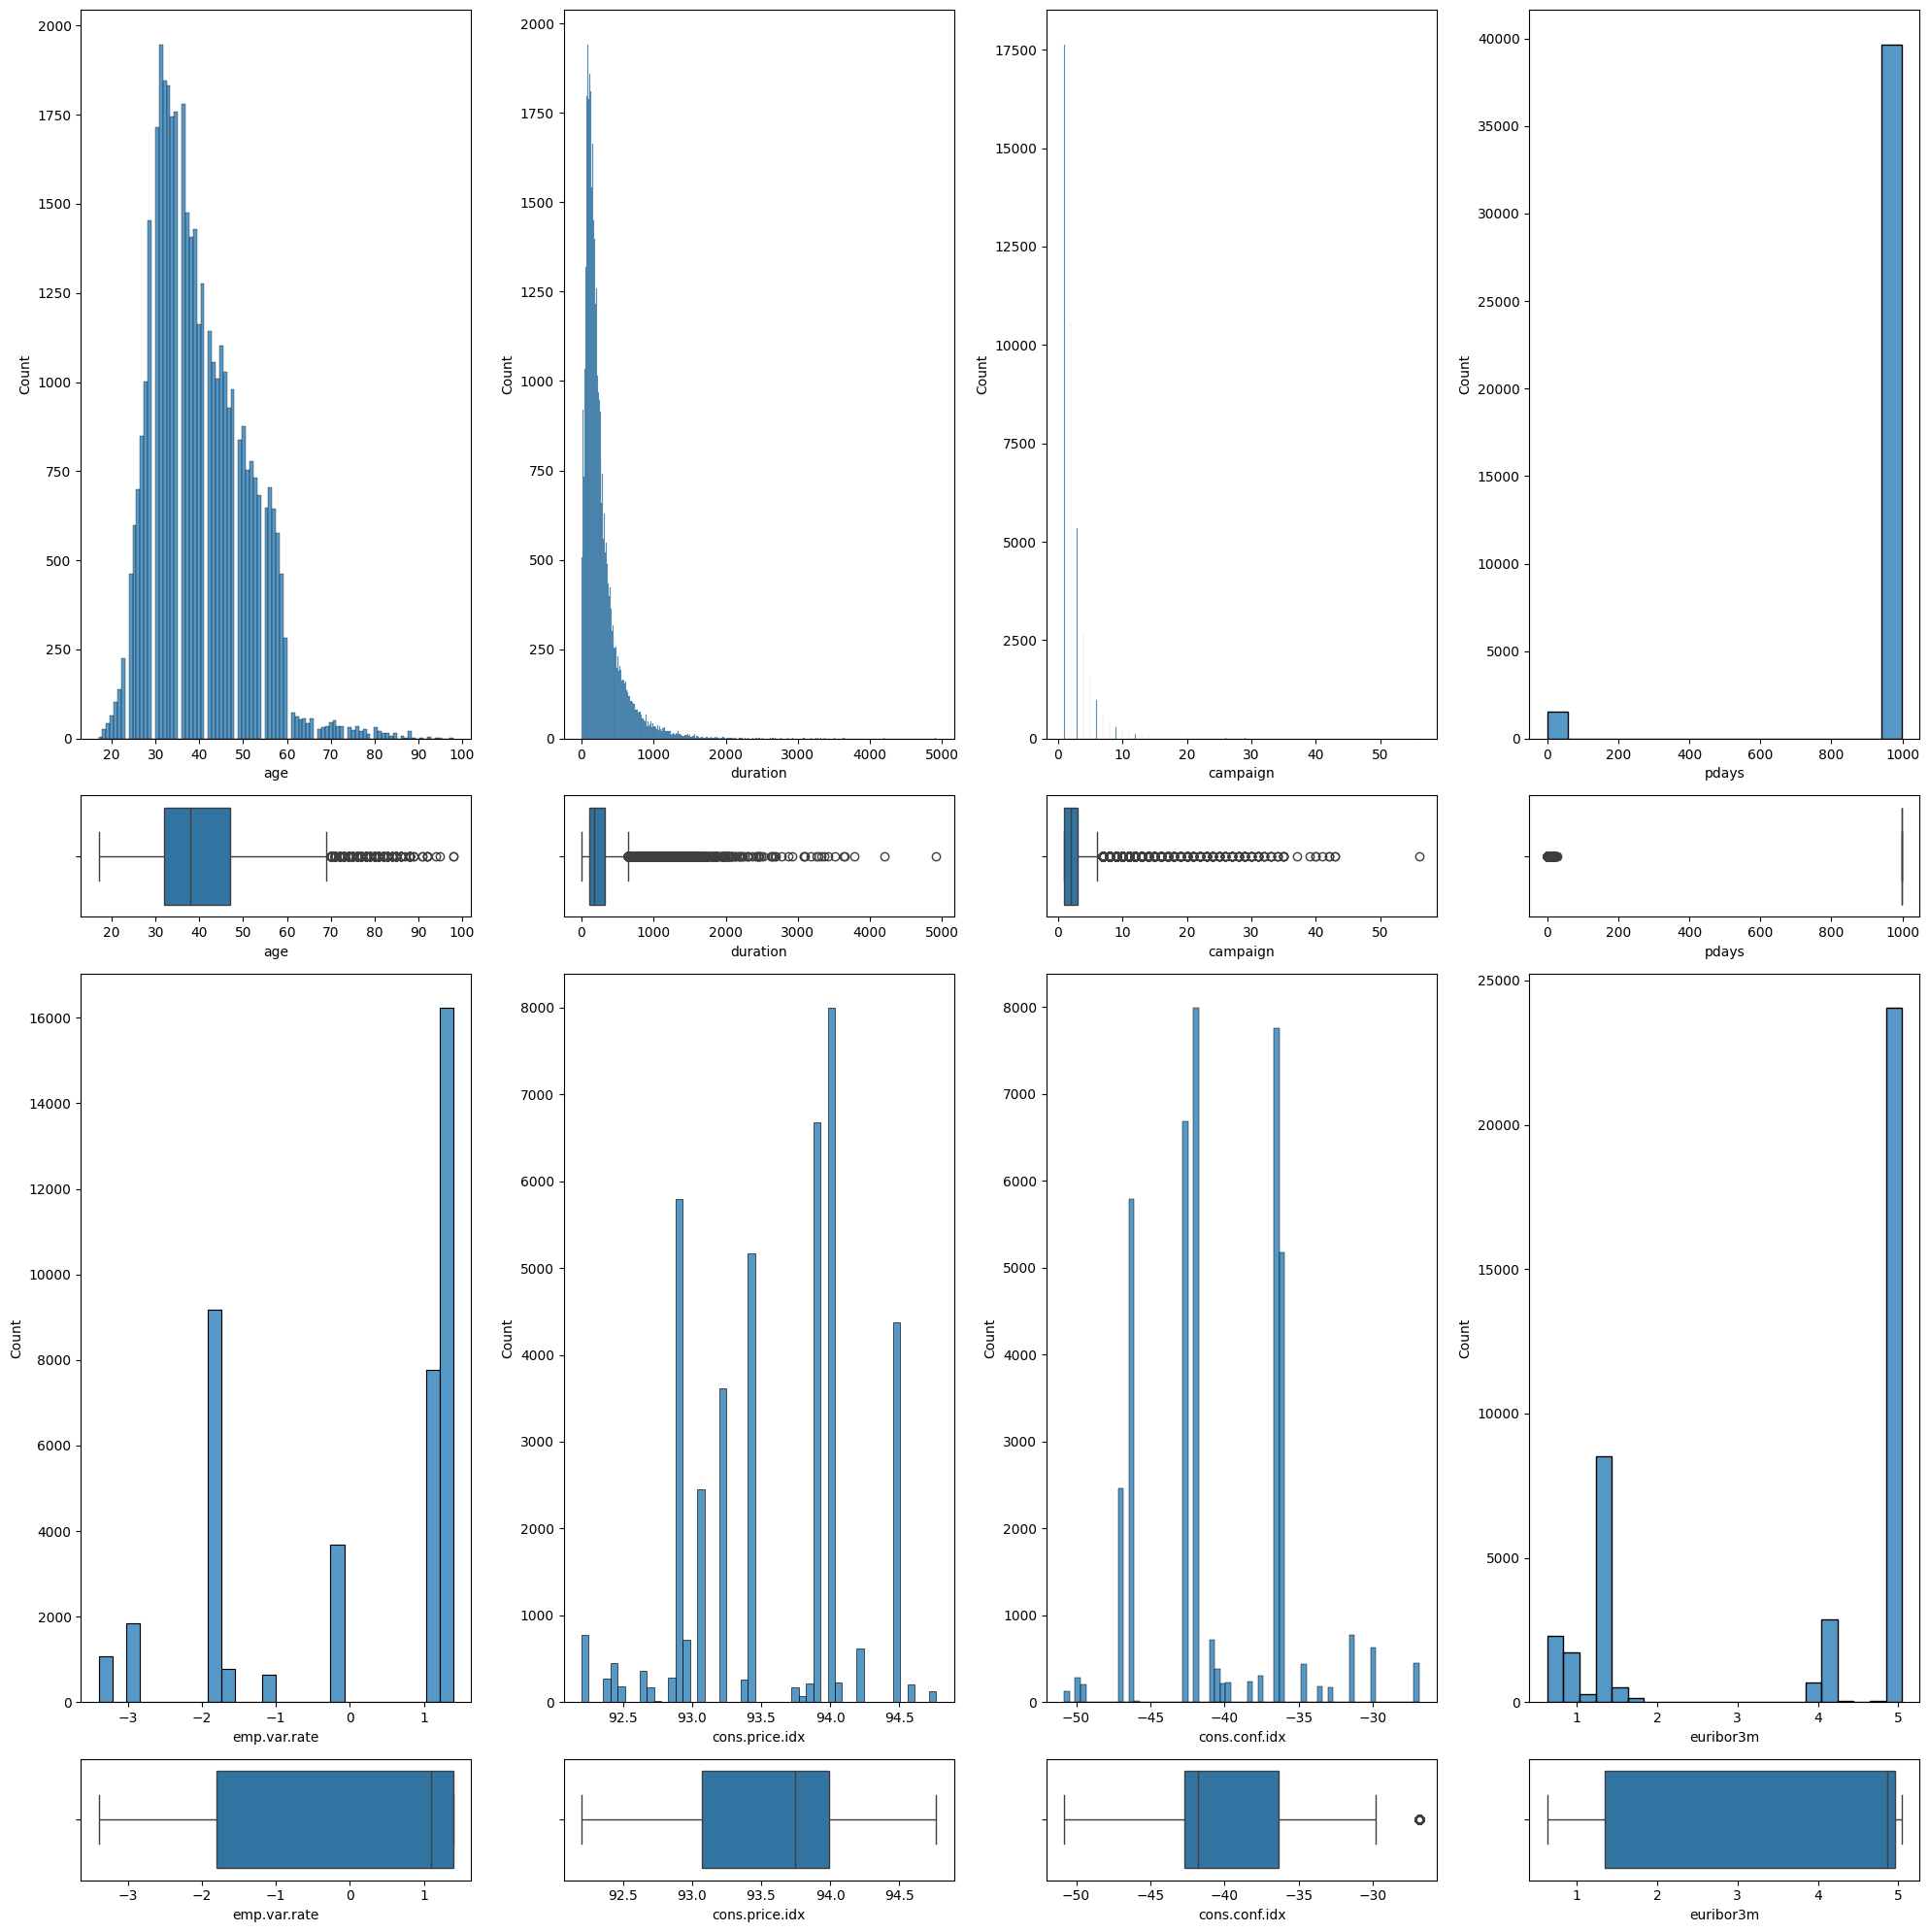

In [8]:
#'age', 'duration', 'campaign', 'pdays','emp.var.rate','cons.price.idx', 'cons.conf.idx','euribor3m', 

fig, axis = plt.subplots(4, 4, figsize=(20, 20),
                         gridspec_kw={"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax=axis[0, 0], data=total_data, x="age")
sns.boxplot(ax=axis[1, 0], data=total_data, x="age")
sns.histplot(ax=axis[0, 1], data=total_data, x="duration")
sns.boxplot(ax=axis[1, 1], data=total_data, x="duration")
sns.histplot(ax=axis[0, 2], data=total_data, x="campaign")
sns.boxplot(ax=axis[1, 2], data=total_data, x="campaign")
sns.histplot(ax=axis[0, 3], data=total_data, x="pdays")
sns.boxplot(ax=axis[1, 3], data=total_data, x="pdays")

sns.histplot(ax=axis[2, 0], data=total_data, x="emp.var.rate")
sns.boxplot(ax=axis[3, 0], data=total_data, x="emp.var.rate")
sns.histplot(ax=axis[2, 1], data=total_data, x="cons.price.idx")
sns.boxplot(ax=axis[3, 1], data=total_data, x="cons.price.idx")
sns.histplot(ax=axis[2, 2], data=total_data, x="cons.conf.idx")
sns.boxplot(ax=axis[3, 2], data=total_data, x="cons.conf.idx")
sns.histplot(ax=axis[2, 3], data=total_data, x="euribor3m")
sns.boxplot(ax=axis[3, 3], data=total_data, x="euribor3m")

plt.tight_layout()
plt.show()

Conclusiones:

1) age: La mayoría de las personas en este grupo tienen entre 20 y 60 años, con una concentración notable alrededor de los 30 y 50 años.
2) duration: Las duraciones tienden a ser cortas en general, pero hay algunos casos donde la duración es significativamente mayor.
3) campaign: La mayoría de los clientes son contactados una sola vez durante la campaña, aunque algunos reciben múltiples contactos.
4) pdays: La gran mayoría de los clientes no han sido contactados en campañas anteriores, o ha pasado mucho tiempo desde el último contacto.
5) emp.var.rate: La tasa de variación del índice de precios al consumidor presenta una distribución con varios picos, indicando la presencia de distintos regímenes económicos.
6) cons.price.idx: El índice de precios al consumidor muestra una distribución con picos claros, indicando que ciertos valores de índice son más frecuentes.
7) cons.conf.idx: El índice de confianza del consumidor también presenta una distribución con picos definidos, sugiriendo que hay niveles de confianza que predominan en los datos.
8) euribor3m: La tasa euribor a 3 meses muestra una alta concentración en valores cercanos a 1 y 5, indicando que estos valores son los más comunes en los datos.

## 3. Análisis de variables multivariante

### 3.1 Numérico-numérico

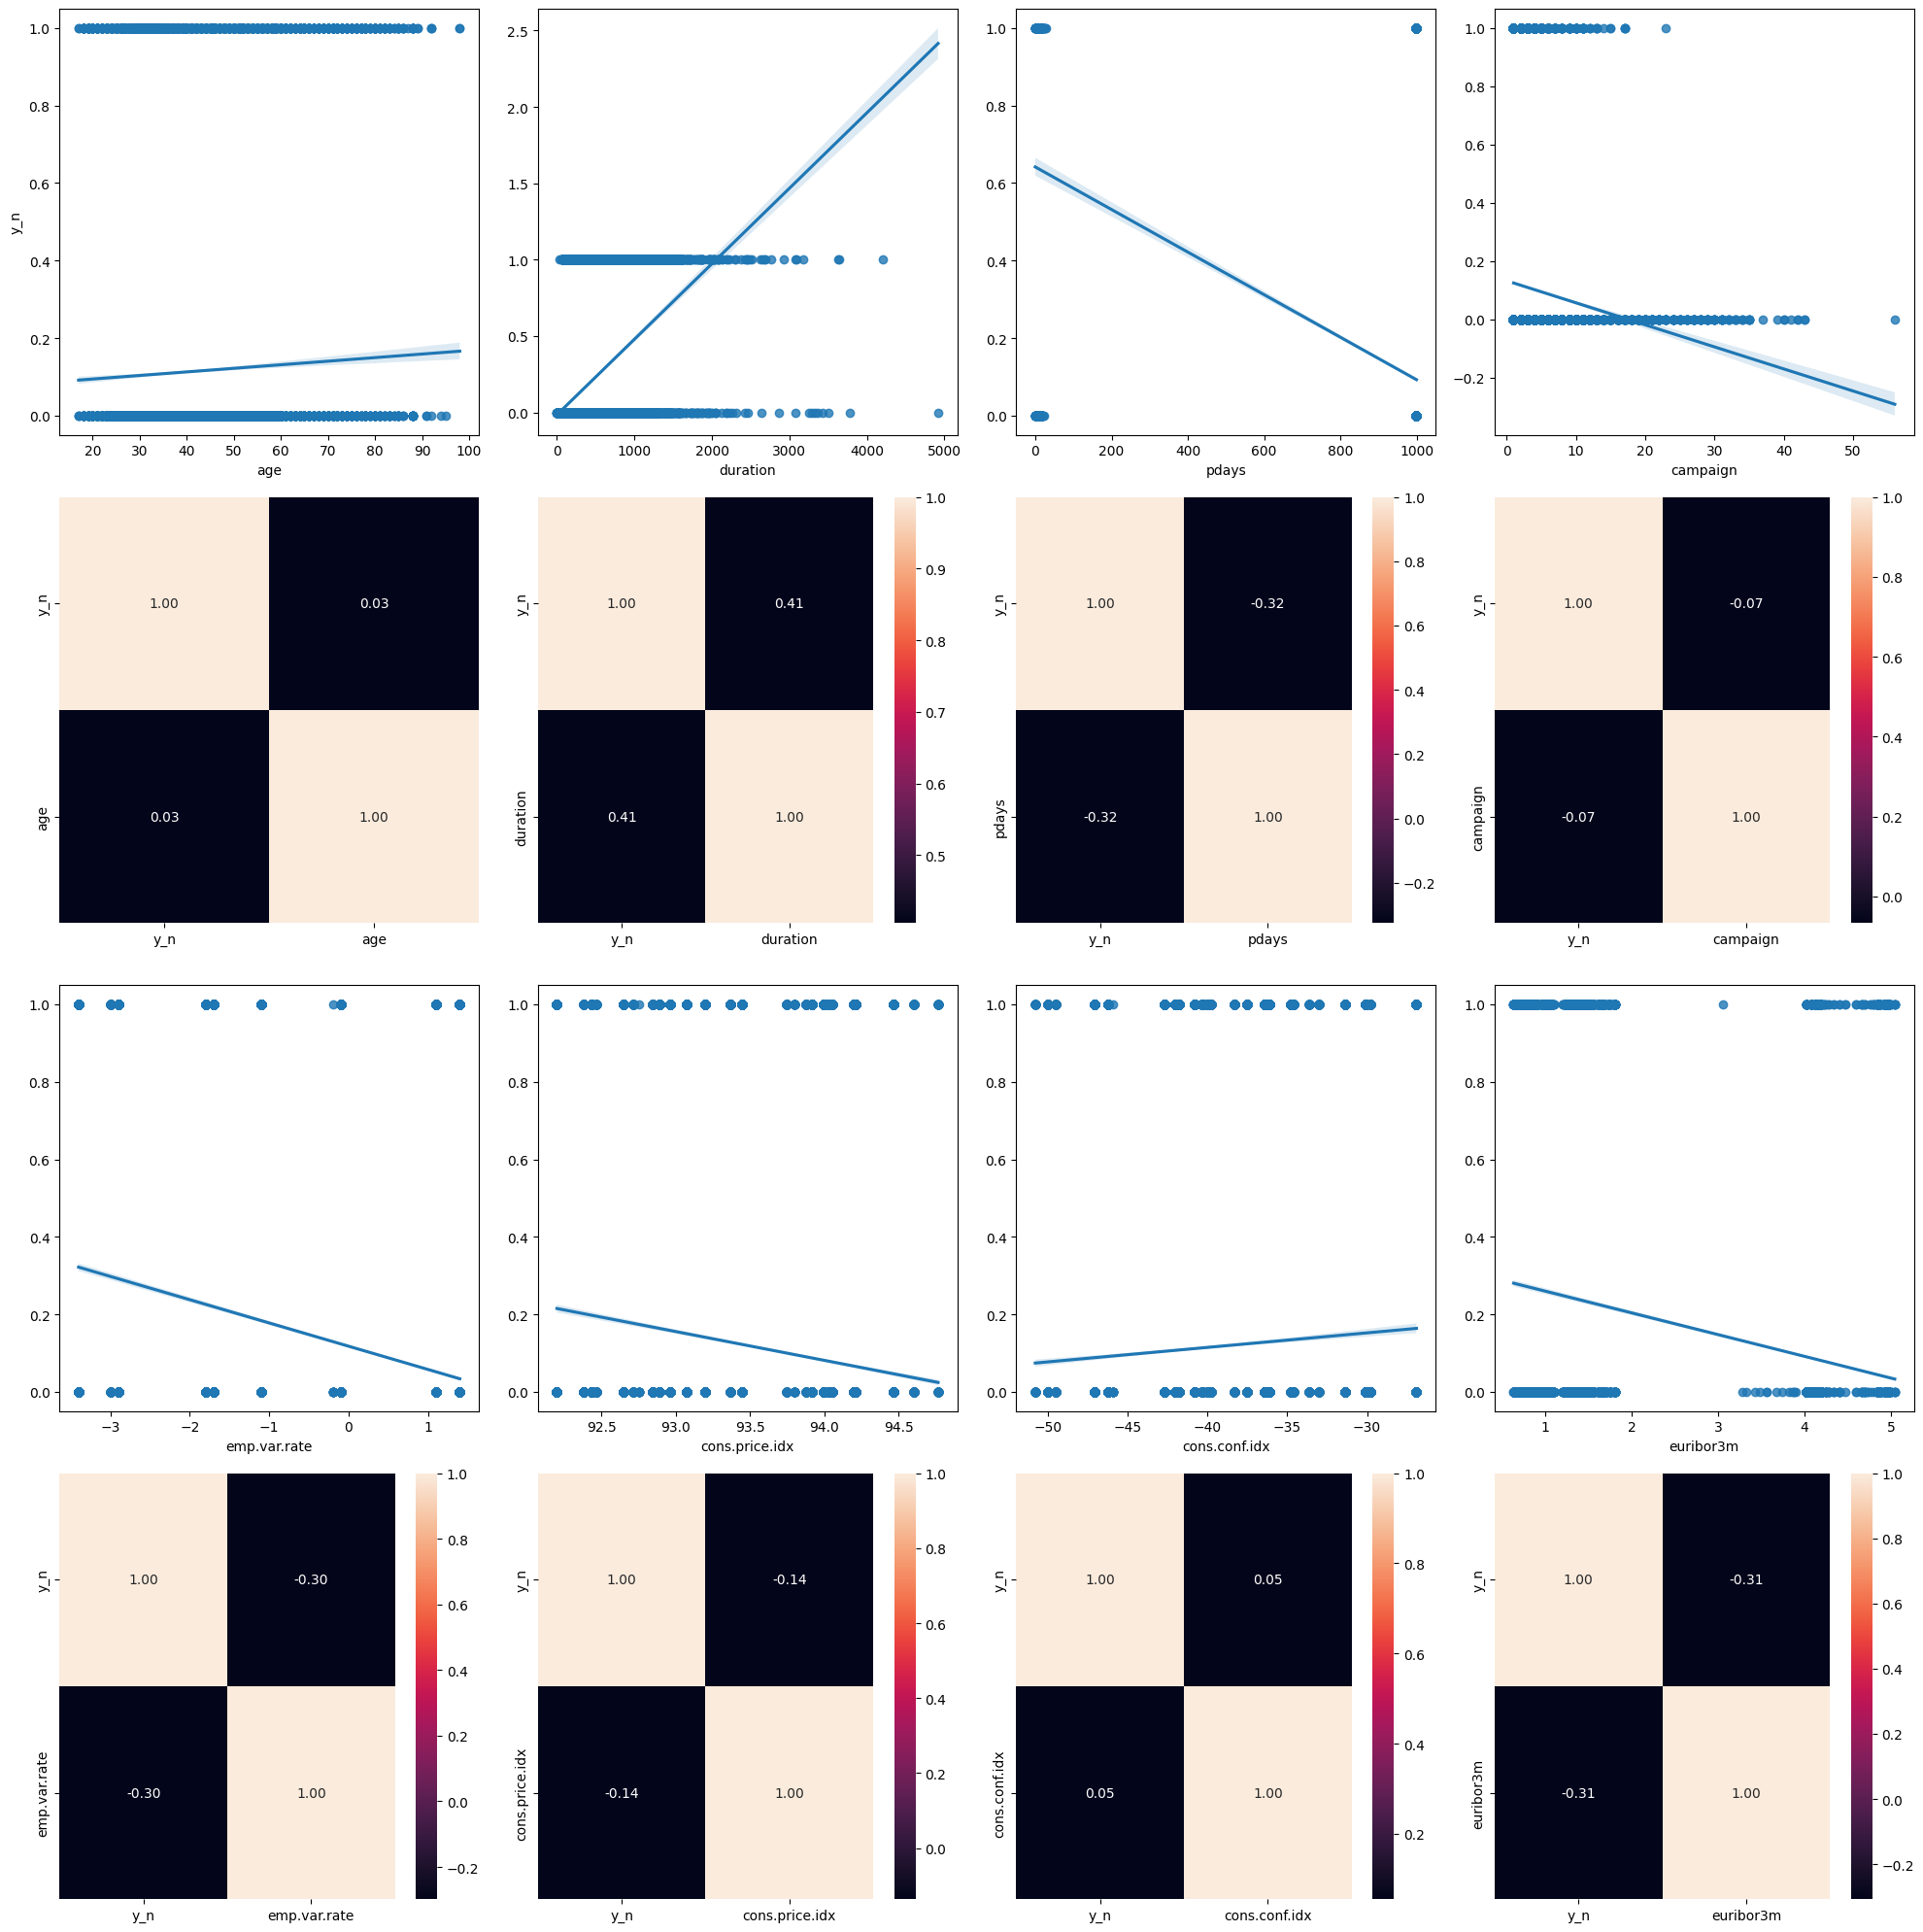

In [9]:
#'age', 'duration', 'campaign', 'pdays','emp.var.rate','cons.price.idx', 'cons.conf.idx','euribor3m', 

total_data["y_n"] = pd.factorize(total_data["y"])[0]
y_transformation_rules = {row["y"]: row["y_n"] for _, row in total_data[["y", "y_n"]].drop_duplicates().iterrows()}
import json
with open("../data/processed/Json/y_tranformation_rules.json", "w") as f:
  json.dump(y_transformation_rules, f)

#Se transformó TARGET en numerical

fig, axis = plt.subplots(4, 4, figsize=(20, 20))

sns.regplot(ax=axis[0, 0], data=total_data, x="age", y="y_n")
sns.heatmap(total_data[["y_n", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=total_data, x="duration", y="y_n").set(ylabel=None)
sns.heatmap(total_data[["y_n", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
sns.regplot(ax=axis[0, 2], data=total_data, x="pdays", y="y_n").set(ylabel=None)
sns.heatmap(total_data[["y_n", "pdays"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2]).set(ylabel=None)
sns.regplot(ax=axis[0, 3], data=total_data, x="campaign", y="y_n").set(ylabel=None)
sns.heatmap(total_data[["y_n", "campaign"]].corr(), annot=True, fmt=".2f", ax=axis[1, 3]).set(ylabel=None)

sns.regplot(ax=axis[2, 0], data=total_data, x="emp.var.rate", y="y_n").set(ylabel=None)
sns.heatmap(total_data[["y_n", "emp.var.rate"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0]).set(ylabel=None)
sns.regplot(ax=axis[2, 1], data=total_data, x="cons.price.idx", y="y_n").set(ylabel=None)
sns.heatmap(total_data[["y_n", "cons.price.idx"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1]).set(ylabel=None)
sns.regplot(ax=axis[2, 2], data=total_data, x="cons.conf.idx", y="y_n").set(ylabel=None)
sns.heatmap(total_data[["y_n", "cons.conf.idx"]].corr(), annot=True, fmt=".2f", ax=axis[3, 2]).set(ylabel=None)
sns.regplot(ax=axis[2, 3], data=total_data, x="euribor3m", y="y_n").set(ylabel=None)
sns.heatmap(total_data[["y_n", "euribor3m"]].corr(), annot=True, fmt=".2f", ax=axis[3, 3]).set(ylabel=None)

plt.tight_layout()
plt.show()

Conclusiones

1) Age vs y_n :
    * La edad tiene una influencia muy pequeña en la variable "y_n". Esto se confirma tanto por la línea de regresión casi plana como por la baja correlación.
    * En otras palabras, la edad de una persona no parece ser un factor importante para determinar el valor de "y_n". 

2) Duration vs y_n: 
    * La duración muestra una relación positiva más clara con "y_n". A medida que la duración aumenta, la probabilidad de que "y_n" sea 1 también aumenta.
    * Esto sugiere que la duración es un factor más relevante para predecir "y_n" en comparación con la edad.

3) pdays vs y_n:
    * Existe una relación inversa moderada entre el número de días desde el último contacto ("pdays") y "y_n". Esto sugiere que cuanto más reciente haya sido el último contacto, mayor es la probabilidad de que "y_n" sea 1.
    * En términos más simples, los clientes que han sido contactados recientemente en campañas anteriores tienden a mostrar un "y_n" más alto.

4) Capaign vs y_n:
    * La relación entre el número de contactos durante la campaña actual ("campaign") y "y_n" es muy débil.
    * Esto indica que el número de veces que se contacta a un cliente durante la campaña actual tiene muy poco impacto en el resultado de "y_n".

5) emp.var.rate vs y_n:
    * La tasa de variación del empleo ("emp.var.rate") muestra una relación inversa moderada con "y_n". Esto sugiere que cuando la economía está en declive (tasa de variación del empleo alta), hay una menor probabilidad de que "y_n" sea 1.
    * En términos más simples, las condiciones económicas adversas parecen influir negativamente en el resultado de "y_n".

6) cons.price.idx y y_n:
    * El índice de precios al consumidor ("cons.price.idx") tiene una influencia débil en "y_n". La relación es negativa, pero la correlación es baja.
    * Esto indica que las fluctuaciones en los precios al consumidor tienen un impacto limitado en el resultado de "y_n".

7) cons.conf.idx y y_n:
    * El índice de confianza del consumidor ("cons.conf.idx") muestra una relación muy débil con "y_n". La línea de regresión es casi plana y la correlación es muy baja (0.05).
    * Esto sugiere que el nivel de confianza del consumidor tiene un impacto mínimo en el resultado de "y_n".

8) euribor3m y y_n:
    * La tasa euribor a 3 meses ("euribor3m") muestra una relación negativa moderada con "y_n". A medida que la tasa euribor aumenta, la probabilidad de que "y_n" sea 1 disminuye.
    * Esto indica que las tasas de interés tienen una influencia en el resultado de "y_n", posiblemente porque tasas de interés más altas pueden afectar la capacidad de los clientes para tomar ciertas decisiones.


### 3.2 Categótico-categórico

"job"
"marital"
"housing"
"loan"
"contact"
"y"
"default"

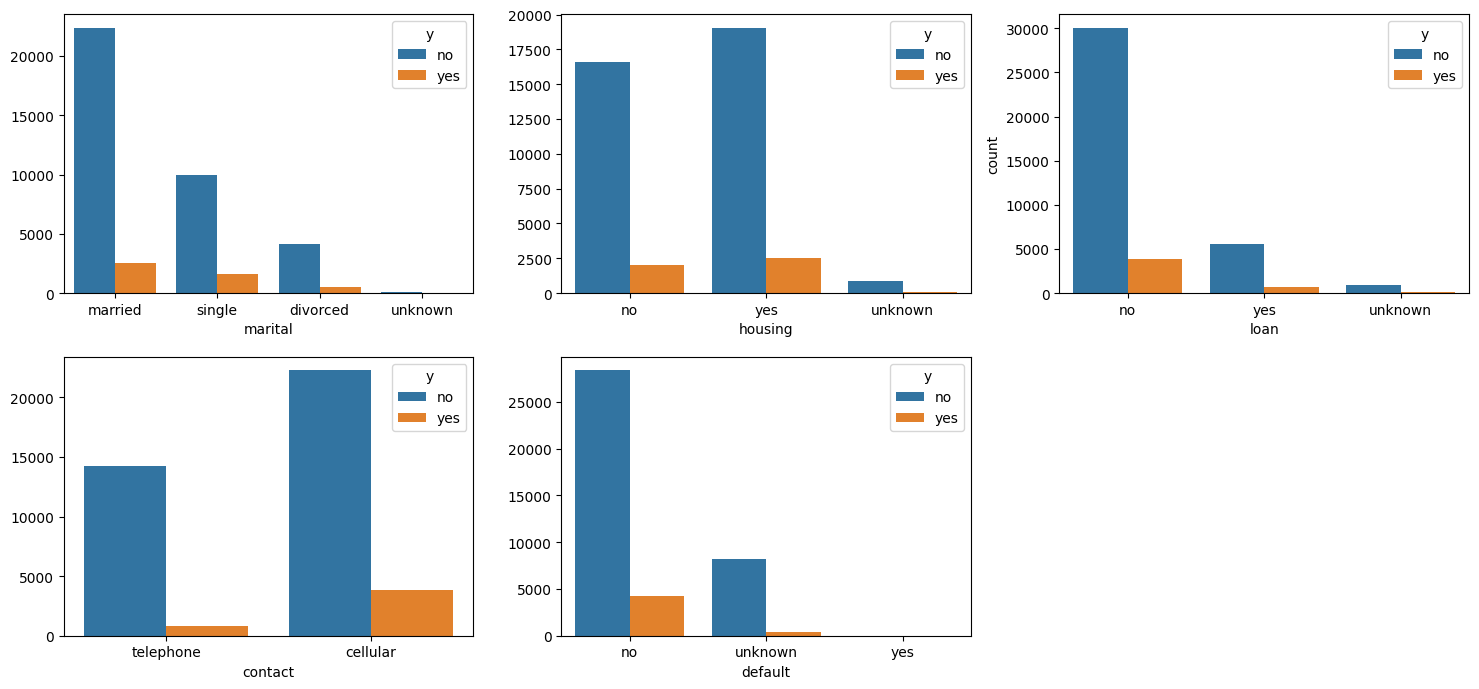

In [10]:
fig, axis = plt.subplots(2, 3, figsize=(15, 7))

sns.countplot(ax=axis[0, 0], data=total_data, x="marital", hue="y").set(ylabel=None)
sns.countplot(ax=axis[0, 1], data=total_data, x="housing", hue="y").set(ylabel=None)
sns.countplot(ax=axis[0, 2], data=total_data, x="loan", hue="y")
sns.countplot(ax=axis[1, 0], data=total_data, x="contact", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 1], data=total_data, x="default", hue="y").set(ylabel=None)  # Corregido

plt.tight_layout()
fig.delaxes(axis[1, 2])
plt.show()

Conclusiones:

1) Estado Civil (marital): La mayoría de las personas son casadas ("married"), seguidas por solteras ("single"). Hay una cantidad notablemente menor de personas divorciadas ("divorced") y muy pocas con estado civil desconocido ("unknown").

2) Vivienda (housing): La mayoría de las personas tienen vivienda ("yes"). Hay una cantidad considerablemente menor de personas que no tienen vivienda ("no"), y muy pocas con estado de vivienda desconocido ("unknown").

3) Préstamo (loan): La mayoría de las personas no tienen préstamo ("no"). Hay una cantidad considerablemente menor de personas que sí tienen préstamo ("yes"), y muy pocas con estado de préstamo desconocido ("unknown").

4) Contacto (contact): La mayoría de los contactos se realizan a través de celular ("cellular"). Hay una cantidad significativamente menor de contactos telefónicos ("telephone"), y muy pocos contactos desconocidos ("unknown").

5) Crédito (default): La gran mayoría de las personas no tienen crédito ("no"). Hay una cantidad muy pequeña de personas con crédito ("yes"), y una cantidad intermedia con estado de crédito desconocido ("unknown").

### 3.3 Combinaciones de la clase con varias predictoras

In [11]:
#'default', 'marital','housing','loan','contact'
# Asignar valores numéricos a las columnas para usar en los gráficos

total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data["contact_n"] = pd.factorize(total_data["contact"])[0]


default_transformation_rules = {row["default"]: row["default_n"] for _, row in total_data[["default", "default_n"]].drop_duplicates().iterrows()}
with open("../data/processed/Json/default_tranformation_rules.json", "w") as f:
  json.dump(default_transformation_rules, f)

marital_transformation_rules = {row["marital"]: row["marital_n"] for _, row in total_data[["marital", "marital_n"]].drop_duplicates().iterrows()}
with open("../data/processed/Json/marital_tranformation_rules.json", "w") as f:
  json.dump(marital_transformation_rules, f)

housing_transformation_rules = {row["housing"]: row["housing_n"] for _, row in total_data[["housing", "housing_n"]].drop_duplicates().iterrows()}
with open("../data/processed/Json/housing_tranformation_rules.json", "w") as f:
  json.dump(housing_transformation_rules, f)

loan_transformation_rules = {row["loan"]: row["loan_n"] for _, row in total_data[["loan", "loan_n"]].drop_duplicates().iterrows()}
with open("../data/processed/Json/loan_tranformation_rules.json", "w") as f:
  json.dump(loan_transformation_rules, f)

contact_transformation_rules = {row["contact"]: row["contact_n"] for _, row in total_data[["contact", "contact_n"]].drop_duplicates().iterrows()}
with open("../data/processed/Json/contact_tranformation_rules.json", "w") as f:
  json.dump(contact_transformation_rules, f)

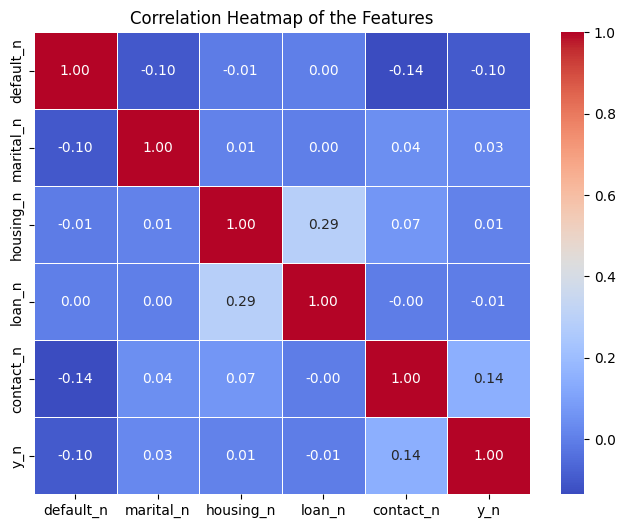

In [12]:
# Crear la matriz de correlación
corr_matrix = total_data[["default_n", "marital_n", "housing_n", "loan_n", "contact_n", "y_n"]].corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Título del gráfico
plt.title("Correlation Heatmap of the Features")

# Mostrar el gráfico
plt.show()

Conclusiones:

* "default_n" (crédito) y "y_n": Presenta una correlación negativa moderada (-0.10), lo que sugiere que la falta de crédito se asocia ligeramente con una menor probabilidad de que "y_n" sea 1.

* "contact_n" (contacto) y "y_n": Muestra la correlación positiva más fuerte (0.14), lo que indica que el tipo de contacto podría tener alguna influencia en el resultado de "y_n".

* Otras variables: "marital_n" (estado civil), "housing_n" (vivienda) y "loan_n" (préstamo) muestran correlaciones muy débiles, lo que sugiere que estas variables tienen poca influencia lineal directa en "y_n".

En resumen, las variables categóricas analizadas no son buenos predictores lineales de "y_n" por sí solas. Es probable que otros factores, o combinaciones de factores, tengan un mayor impacto en la predicción de "y_n". Además, es importante considerar que las correlaciones representan solo relaciones lineales y podrían no capturar relaciones no lineales o interacciones complejas entre las variables.

### 3.4 Categórico-numérico

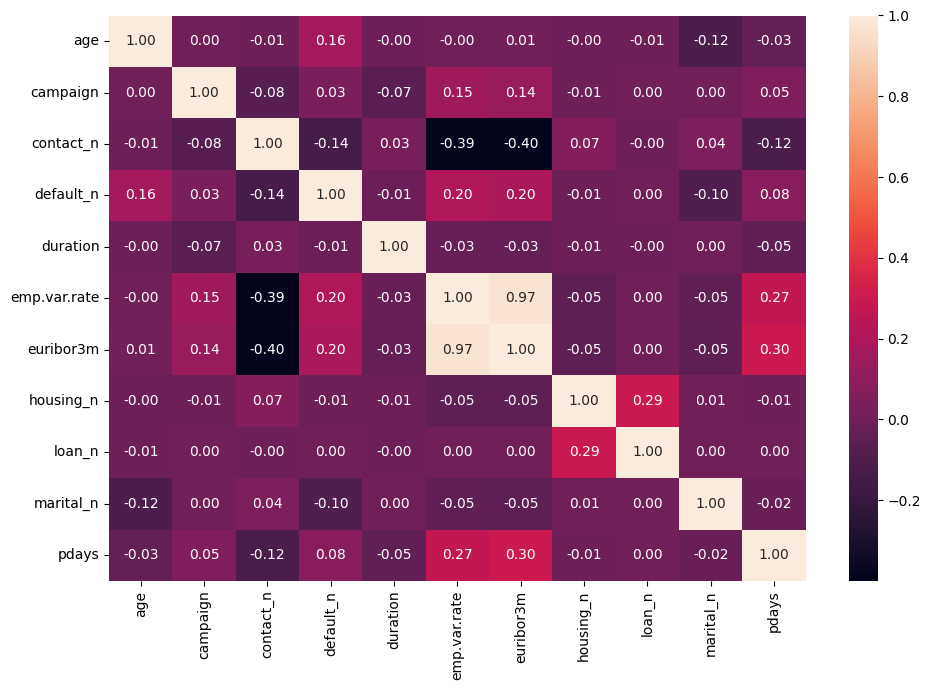

In [13]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["age", "campaign", "contact_n", "default_n", "duration", "emp.var.rate", "euribor3m", "housing_n", "loan_n", "marital_n", "pdays"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Conclusiones:

El mapa de calor muestra que la mayoría de las variables tienen relaciones lineales débiles entre sí. Las únicas relaciones notables son:

* emp.var.rate y euribor3m: Están fuertemente relacionadas (0.97).
* contact_n: Tiene una relación moderada con emp.var.rate y euribor3m.
* pdays: Tiene una relación moderada con emp.var.rate y euribor3m.
* housing_n y loan_n: Tienen una relación moderada entre ellas.

En general, las variables no se influyen mucho linealmente entre sí, excepto por las relaciones mencionadas.

## 4. Análisis de toda la data en una

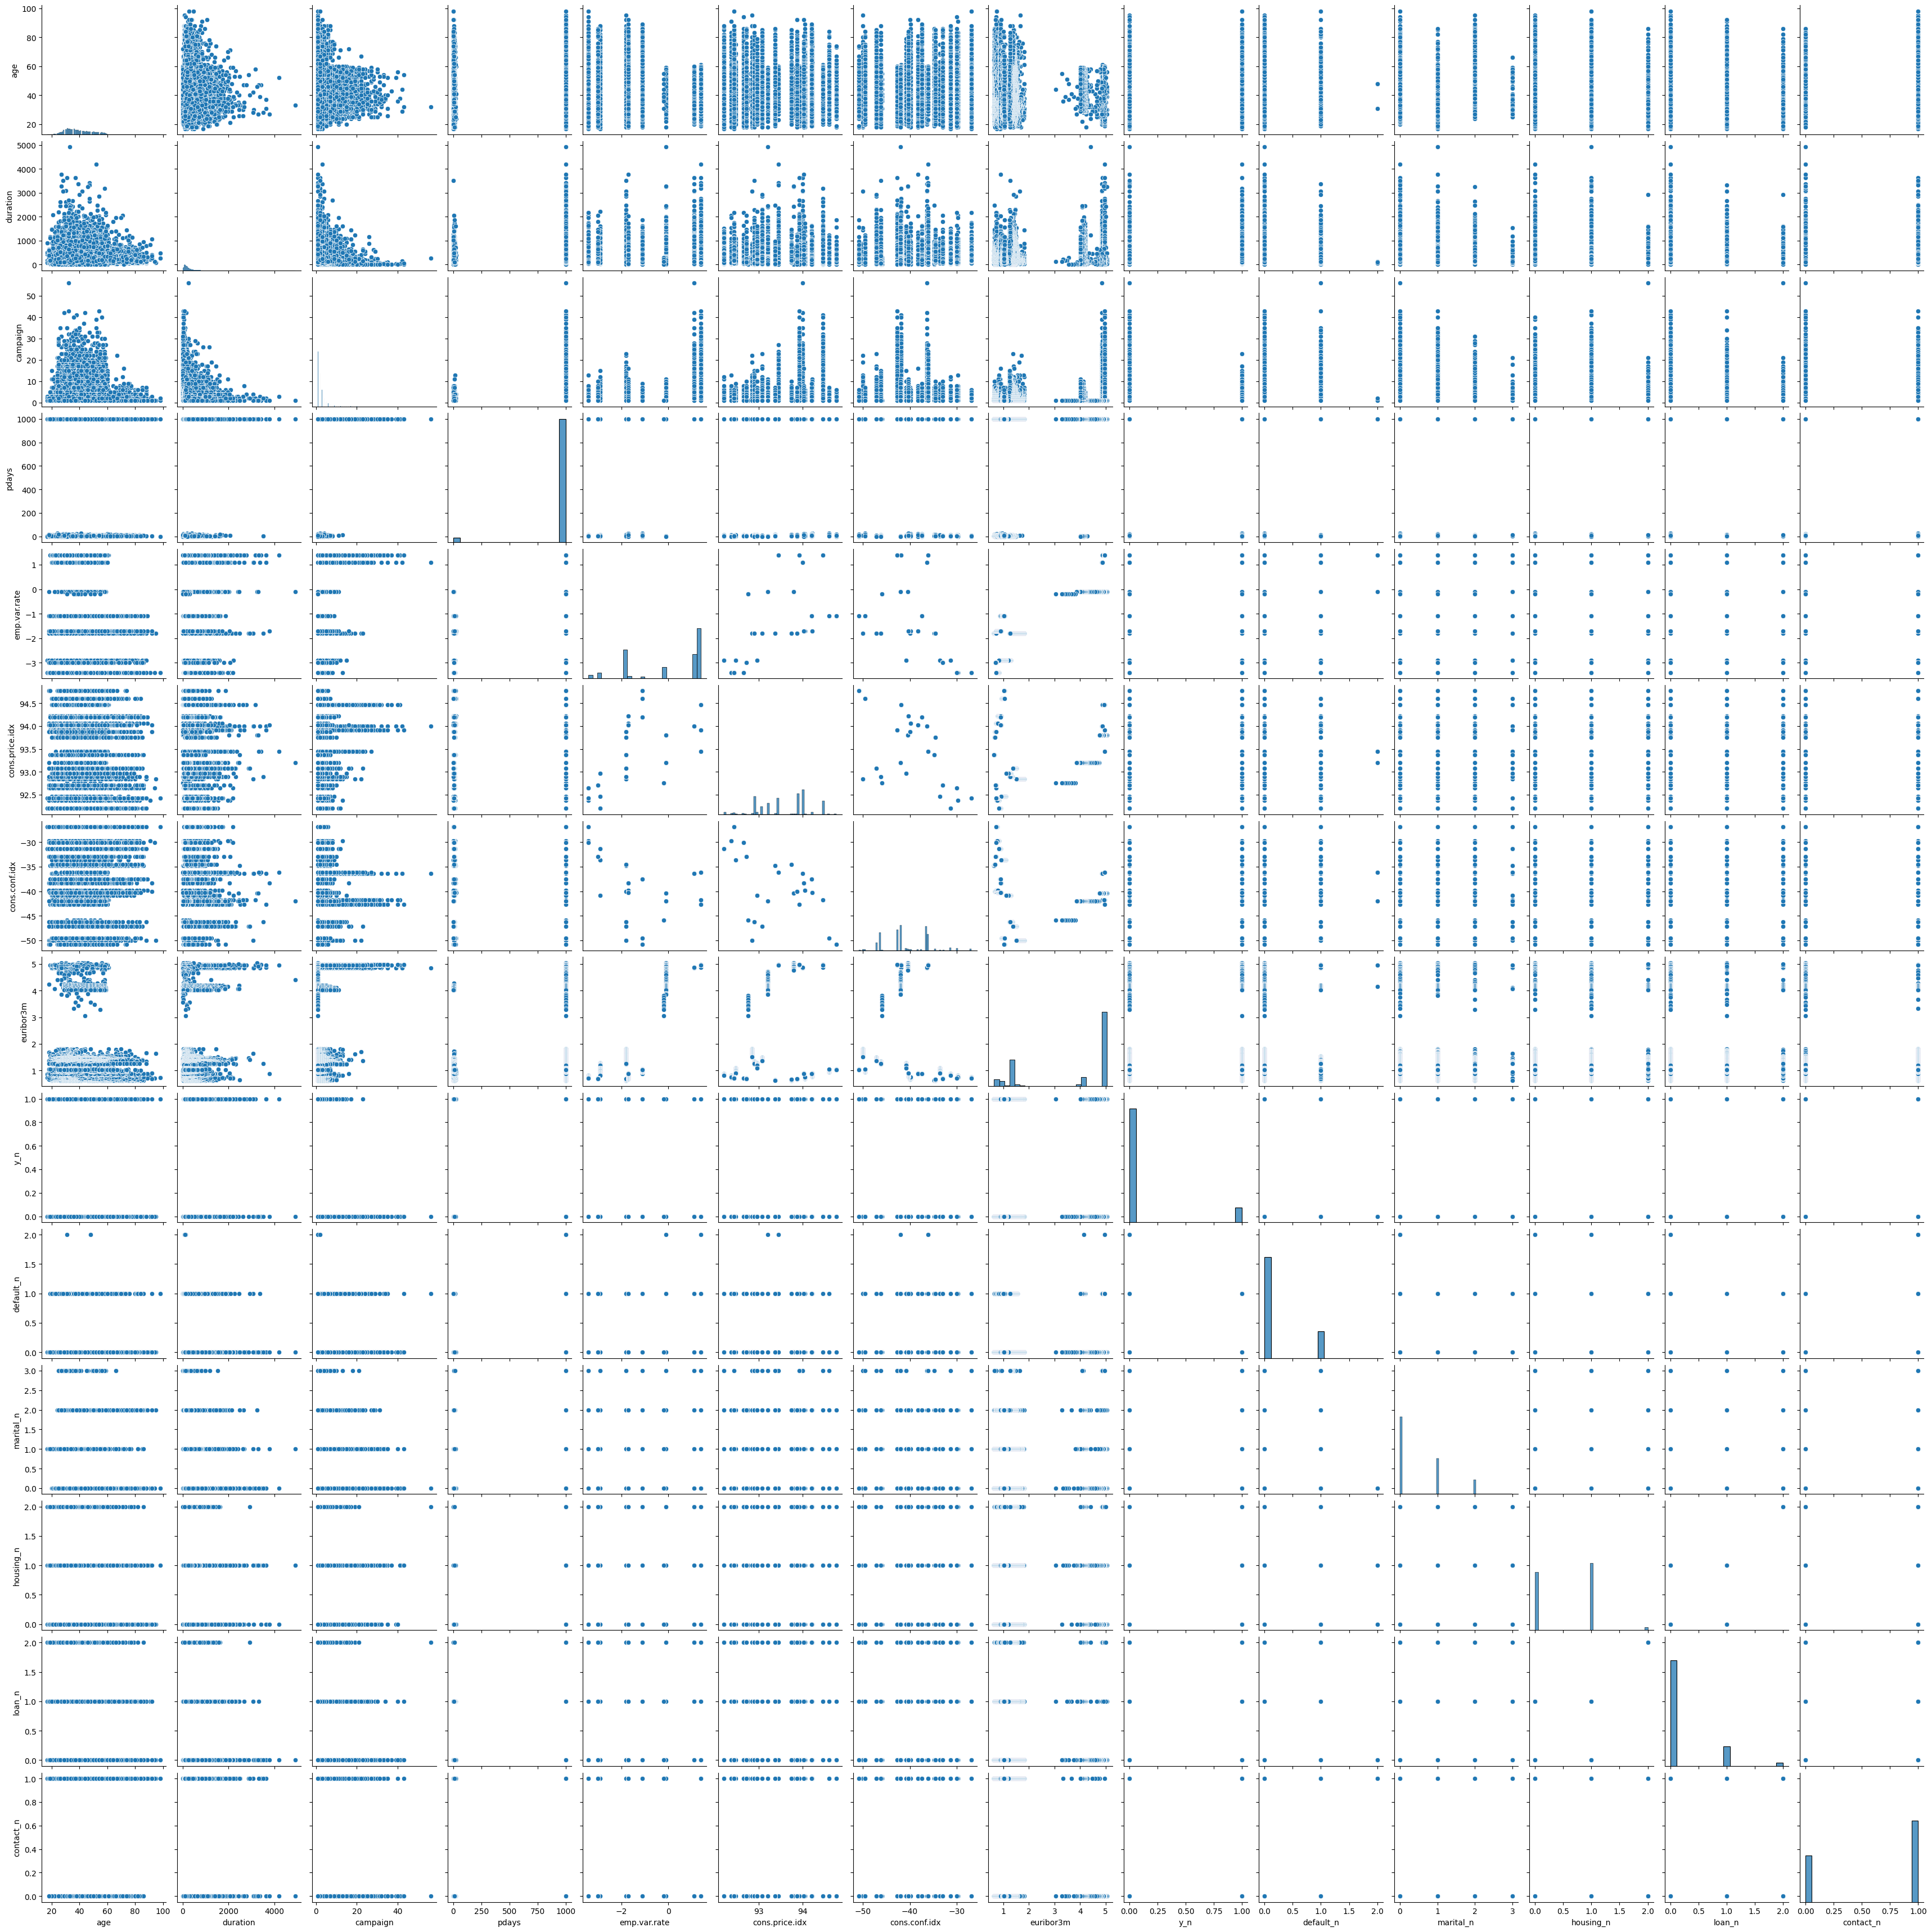

In [14]:
sns.pairplot(data = total_data)

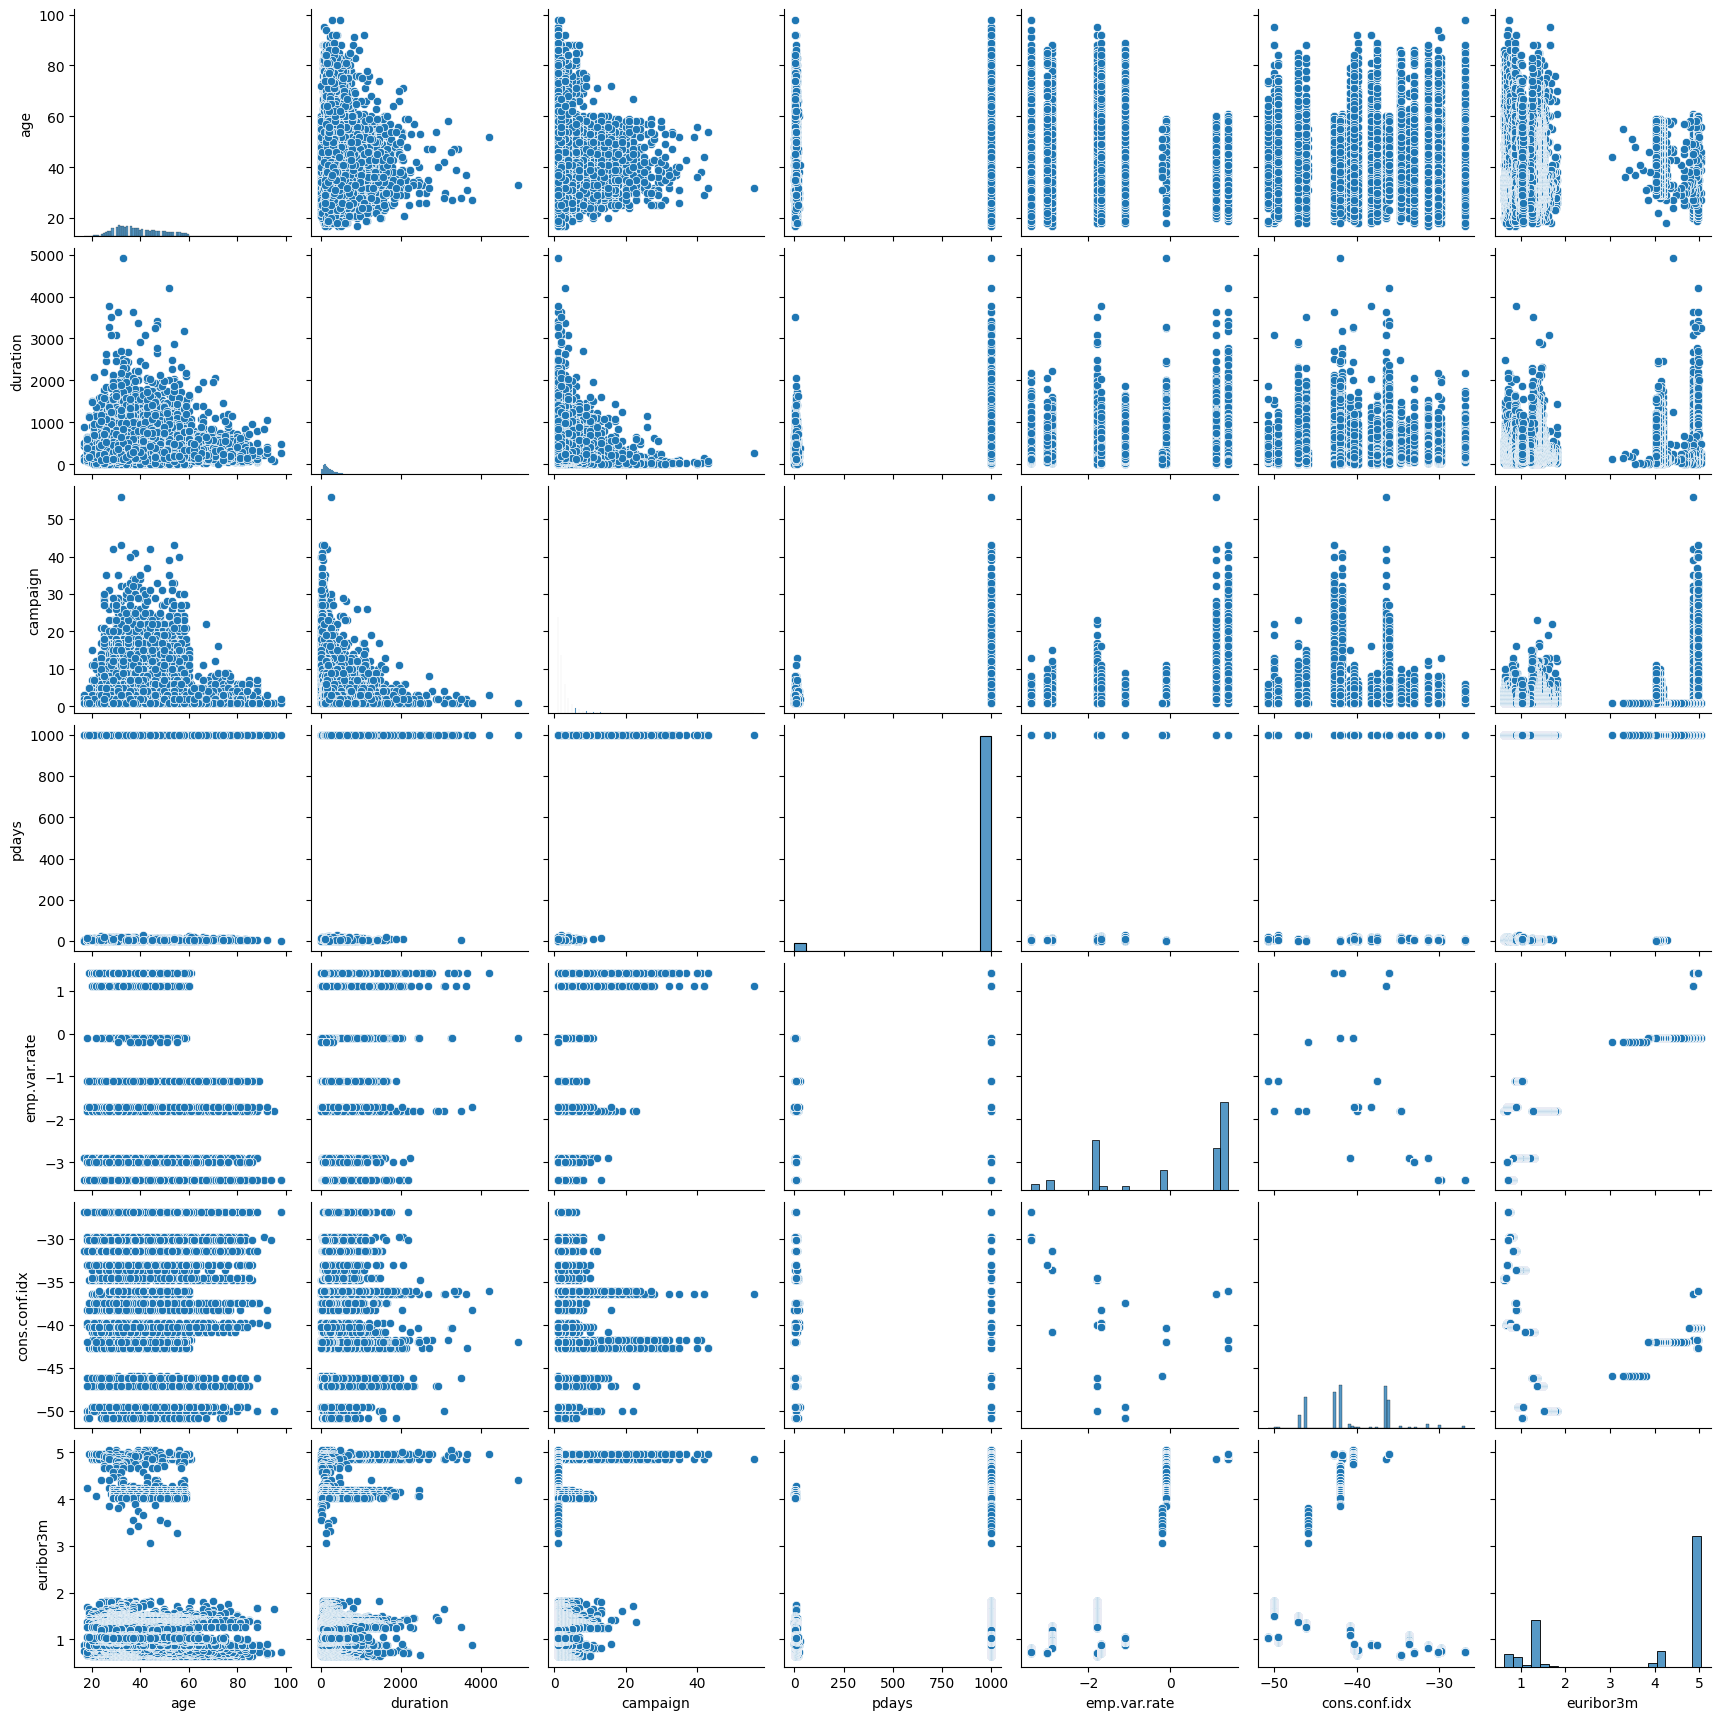

In [15]:
variances = total_data.select_dtypes(include='number').var()

# Define un umbral para la varianza
threshold = variances.median()  # Puedes ajustar este umbral

# Filtra las columnas con varianza mayor que el umbral
selected_columns = variances[variances > threshold].index

# Crea el pairplot solo con las columnas seleccionadas
sns.pairplot(data=total_data[selected_columns])
plt.show()

## 5. Feature Engineering

### 5.1 Análisis Outliers

In [16]:
total_data.describe()

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y_n,default_n,marital_n,housing_n,loan_n,contact_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.081922,93.575720,-40.502863,3.621293,0.112663,0.208908,0.510637,0.571959,0.199825,0.634714
std,10.42068,259.305321,2.770318,186.937102,1.570883,0.578839,4.627860,1.734437,0.316184,0.406713,0.696794,0.541216,0.456055,0.481516
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,-1.800000,93.075000,-42.700000,1.344000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,1.100000,93.749000,-41.800000,4.857000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,47.00000,319.000000,3.000000,999.000000,1.400000,93.994000,-36.400000,4.961000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,98.00000,4918.000000,56.000000,999.000000,1.400000,94.767000,-26.900000,5.045000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


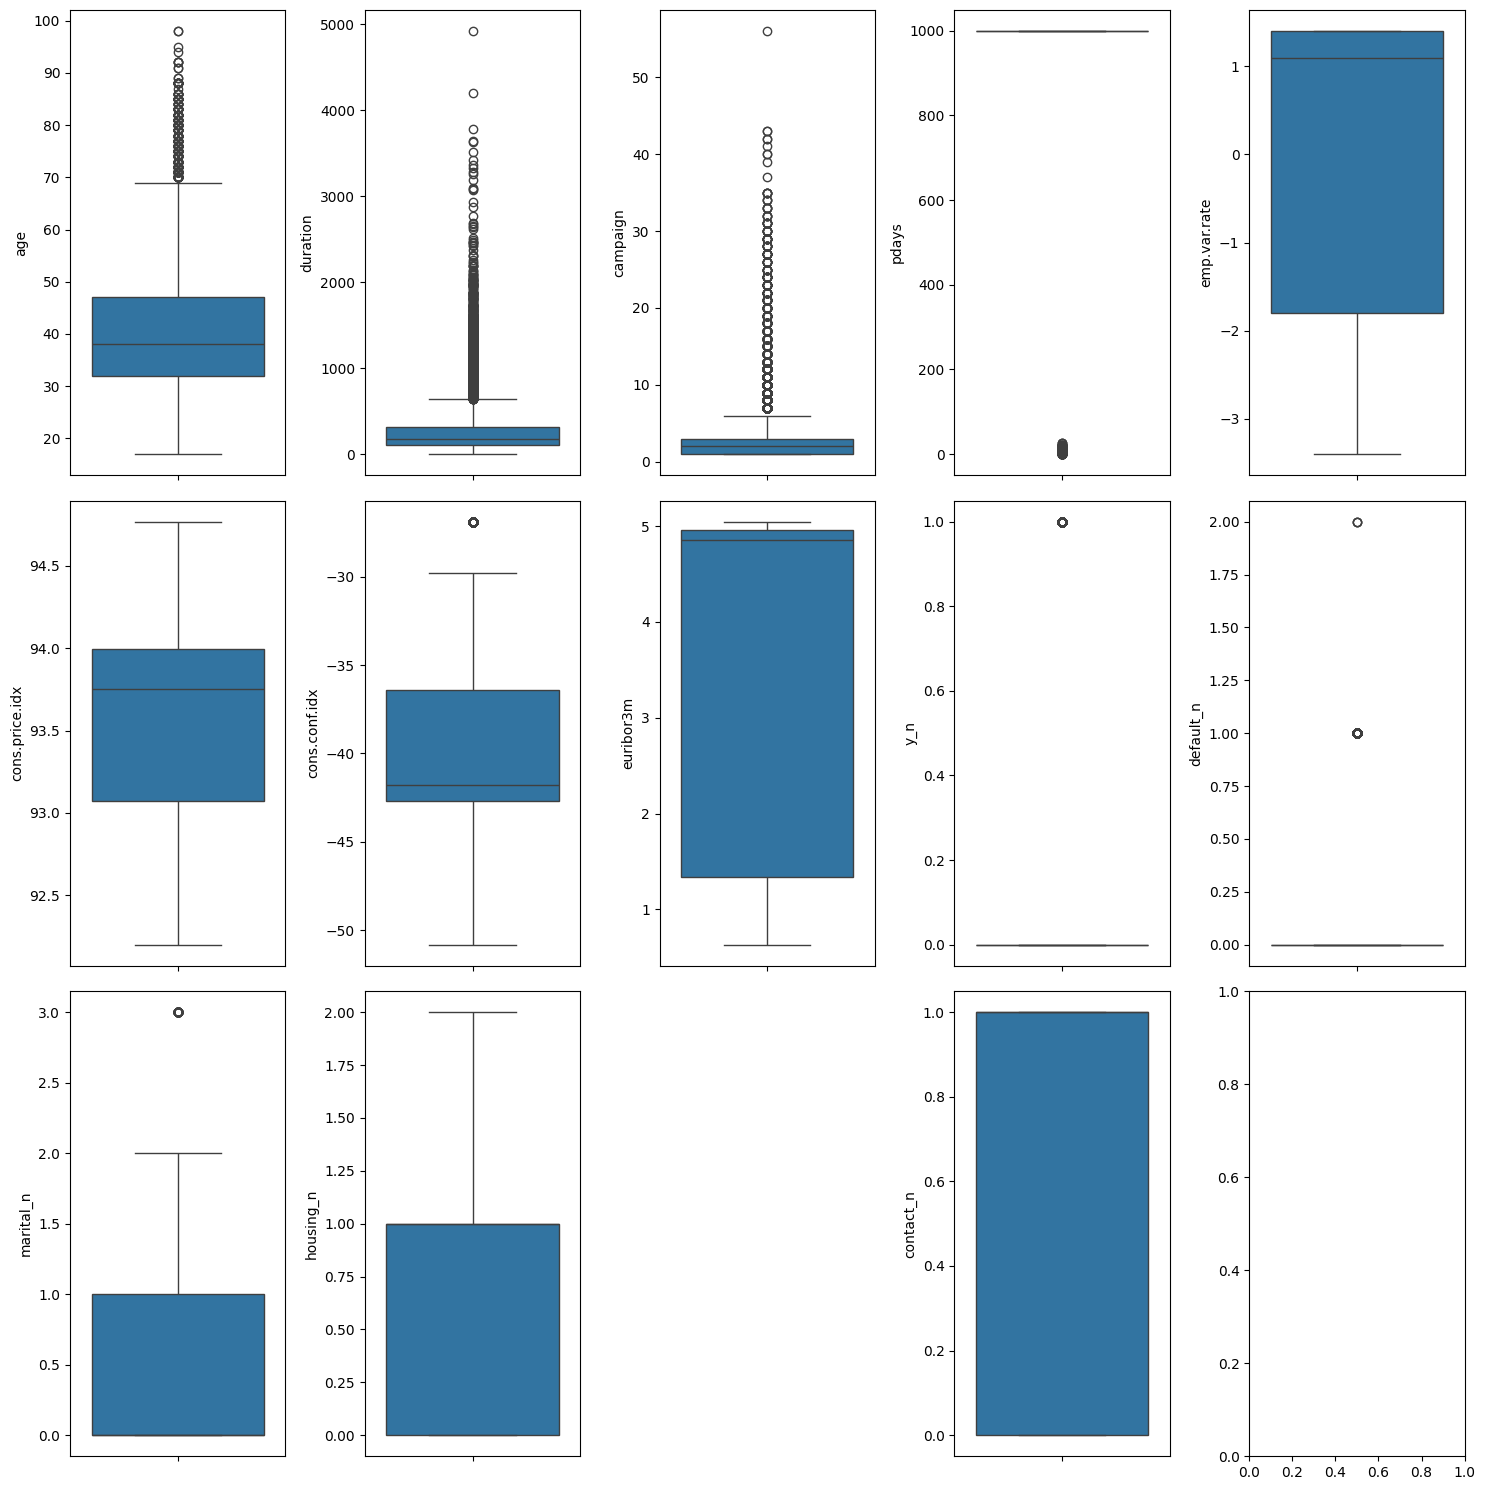

In [17]:
fig, axes = plt.subplots(3, 5, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "duration")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "campaign")
sns.boxplot(ax = axes[0, 3], data = total_data, y = "pdays")
sns.boxplot(ax = axes[0, 4], data = total_data, y = "emp.var.rate")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "cons.price.idx")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "cons.conf.idx")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "euribor3m")
sns.boxplot(ax = axes[1, 3], data = total_data, y = "y_n")
sns.boxplot(ax = axes[1, 4], data = total_data, y = "default_n")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "marital_n")
sns.boxplot(ax = axes[2, 1], data = total_data, y = "housing_n")
sns.boxplot(ax = axes[2, 2], data = total_data, y = "loan_n")
sns.boxplot(ax = axes[2, 3], data = total_data, y = "contact_n")

fig.delaxes(axes[2, 2])

plt.tight_layout()

plt.show()

In [18]:
total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

def replace_outliers(column, df):
    colum_stats = df[column].describe()
    IQR = colum_stats["75%"] - colum_stats["25%"]
    lower_bound = colum_stats["25%"] - 1.5 * IQR
    upper_bound = colum_stats["75%"] + 1.5 * IQR
    if lower_bound < 0: lower_bound = min(df[column])
    #remove upper outliers
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
    #remove lower outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
    return df.copy(), [lower_bound, upper_bound]

outliers_dict = {}
for column in ["age", "campaign", "duration", "pdays", "default_n"]:
    total_data_sin_outliers, limit_list = replace_outliers(column, total_data_sin_outliers)
    # Convertir los límites de np.float64 a float nativo de Python
    outliers_dict[column] = [float(limit) for limit in limit_list] 

with open("../data/processed/Json/outliers_dict.json", "w") as f:
    json.dump(outliers_dict, f)

outliers_dict

{'age': [9.5, 69.5],
 'campaign': [1.0, 6.0],
 'duration': [0.0, 644.5],
 'pdays': [999.0, 999.0],
 'default_n': [0.0, 0.0]}

### 5.2  Anáisis de valores faltantes

In [19]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

age               0
cons.price.idx    0
loan_n            0
housing_n         0
marital_n         0
default_n         0
y_n               0
y                 0
euribor3m         0
cons.conf.idx     0
emp.var.rate      0
job               0
pdays             0
campaign          0
duration          0
contact           0
loan              0
housing           0
default           0
marital           0
contact_n         0
dtype: int64

Conclusiones: En este DF no se presentan valores faltantes

### 5.3 Inferencia de nuevas caraterísticas

No hay columnas en el DF que pueda aplicarse para la inferencia de nuevas características

## 6. Feature Scalling

In [20]:
num_variables = ["age", "campaign", "duration", "pdays", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "default_n", "marital_n", "housing_n", "loan_n", "contact_n"]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("y_n", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("y_n", axis = 1)[num_variables]
y = total_data_con_outliers["y_n"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

X_train_con_outliers.head()

,age,campaign,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,default_n,marital_n,housing_n,loan_n,contact_n
12348,29,3,286,999,1.4,93.918,-42.7,4.959,0,0,1,1,0
8565,50,6,178,999,1.4,94.465,-41.8,4.864,0,1,0,0,0
21424,29,4,103,999,1.4,93.444,-36.1,4.963,0,1,0,0,1
3316,35,1,135,999,1.1,93.994,-36.4,4.860,0,1,0,0,0
33246,40,1,418,999,-1.8,92.893,-46.2,1.291,1,1,0,0,1


### 6.1 Normalización

In [21]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,age,campaign,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,default_n,marital_n,housing_n,loan_n,contact_n
12348,-1.058427,0.152155,0.112453,0.195697,0.838815,0.589534,-0.470932,0.771196,-0.511455,-0.734095,0.788248,1.750366,-1.316322
8565,0.954767,1.229538,-0.305973,0.195697,0.838815,1.534740,-0.276368,0.716413,-0.511455,0.698859,-1.060840,-0.440002,-1.316322
21424,-1.058427,0.511282,-0.596546,0.195697,0.838815,-0.229530,0.955866,0.773502,-0.511455,0.698859,-1.060840,-0.440002,0.759693
3316,-0.483229,-0.566100,-0.472568,0.195697,0.647683,0.720860,0.891011,0.714107,-0.511455,0.698859,-1.060840,-0.440002,-1.316322
33246,-0.003897,-0.566100,0.623862,0.195697,-1.199927,-1.181648,-1.227566,-1.343979,1.953044,0.698859,-1.060840,-0.440002,0.759693


### 6.2 Escalado Mínimo-Máximo

In [22]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,campaign,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,default_n,marital_n,housing_n,loan_n,contact_n
12348,0.148148,0.036364,0.058154,1.0,1.000000,0.669135,0.338912,0.980503,0.0,0.000000,0.5,0.5,0.0
8565,0.407407,0.090909,0.036194,1.0,1.000000,0.882307,0.376569,0.958966,0.0,0.333333,0.0,0.0,0.0
21424,0.148148,0.054545,0.020943,1.0,1.000000,0.484412,0.615063,0.981410,0.0,0.333333,0.0,0.0,1.0
3316,0.222222,0.000000,0.027450,1.0,0.937500,0.698753,0.602510,0.958059,0.0,0.333333,0.0,0.0,0.0
33246,0.283951,0.000000,0.084994,1.0,0.333333,0.269680,0.192469,0.148946,0.5,0.333333,0.0,0.0,1.0


### 6.3 Selección de Características

In [23]:
#Prueba con k=5 para seleccionar las mejores variables para el modelo con outliers sc

modelo_seleccion = SelectKBest(f_classif, k = 5)
modelo_seleccion.fit(X_train_con_outliers_scal, y_train)

ix = modelo_seleccion.get_support()
x_train_sel = pd.DataFrame(modelo_seleccion.transform(X_train_con_outliers_scal), columns = X_train_con_outliers_scal.columns.values[ix])
x_test_sel = pd.DataFrame(modelo_seleccion.transform(X_test_con_outliers_scal), columns = X_test_con_outliers_scal.columns.values[ix])  

# GUARDAR LOS DATASETS

with open("../data/processed/Json/featureselection_k_5.json", "w") as f:
  json.dump(list(x_train_sel.columns), f)   

x_train_sel.head()

,duration,pdays,emp.var.rate,euribor3m,contact_n
0,0.058154,1.0,1.000000,0.980503,0.0
1,0.036194,1.0,1.000000,0.958966,0.0
2,0.020943,1.0,1.000000,0.981410,1.0
3,0.027450,1.0,0.937500,0.958059,0.0
4,0.084994,1.0,0.333333,0.148946,1.0


In [24]:
x_train_sel["y_n"]=list(y_train)
x_test_sel["y_n"]=list(y_test)

x_train_sel.to_csv("../models/x_train_sel.csv", index = False)
x_test_sel.to_csv("../models/x_test_sel.csv", index = False)

## 7. Modelo de Regresión logística

In [26]:
train_data = pd.read_csv("../models/x_train_sel.csv")
test_data = pd.read_csv("../models/x_test_sel.csv")

train_data.head()

,duration,pdays,emp.var.rate,euribor3m,contact_n,y_n
0,0.058154,1.0,1.000000,0.980503,0.0,0
1,0.036194,1.0,1.000000,0.958966,0.0,0
2,0.020943,1.0,1.000000,0.981410,1.0,0
3,0.027450,1.0,0.937500,0.958059,0.0,0
4,0.084994,1.0,0.333333,0.148946,1.0,0


In [27]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(8236,))

In [37]:
accuracy_score(y_test, y_pred)

0.9010441962117532

## 8. Optimización del modelo

In [38]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [39]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [40]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [41]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(8236,))

In [42]:
accuracy_score(y_test, y_pred)

0.8977659057795047

In [1]:
dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))

NameError: name 'dump' is not defined